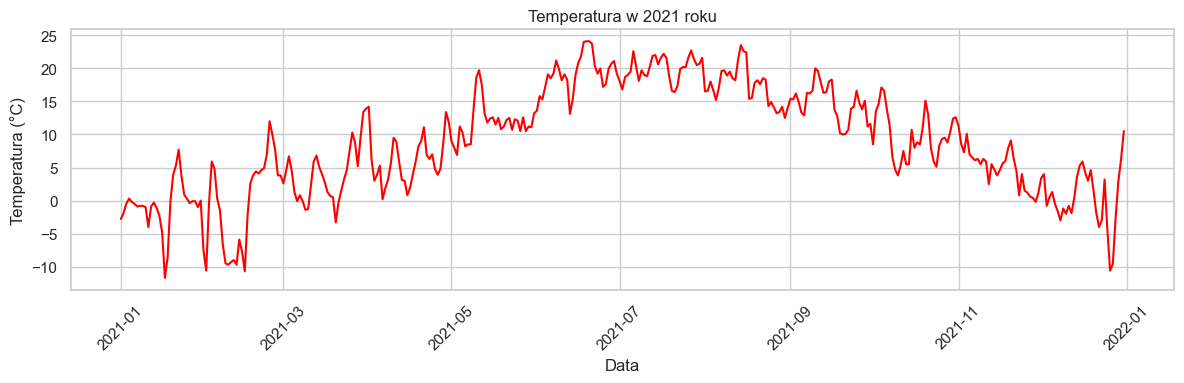

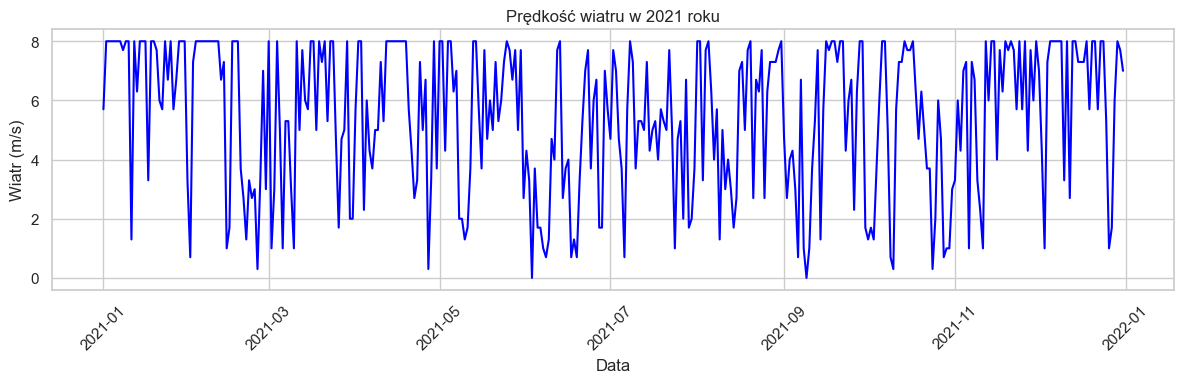

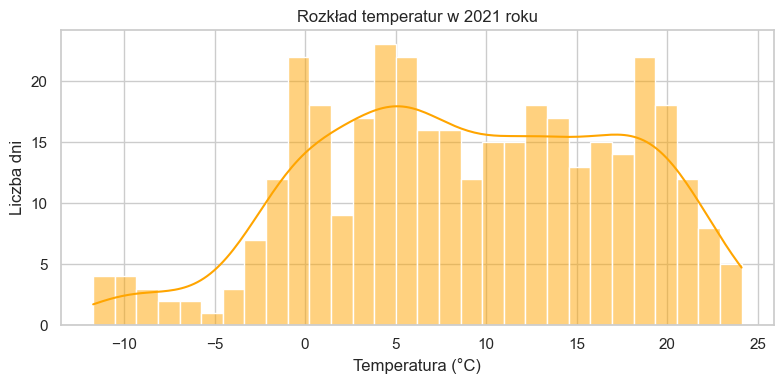

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych
df = pd.read_csv('DanePogodowe2021.csv', sep=';', decimal='.')

# Konwersja daty
df = df.rename(columns={'Rok': 'year', 'Miesiąc': 'month', 'Dzień': 'day'})
df['Data'] = pd.to_datetime(df[['year', 'month', 'day']])
# df['Data'] = pd.to_datetime(df[['Rok', 'Miesiąc', 'Dzień']])

# Ustawienie stylu wykresów
sns.set(style='whitegrid')

# Wykres temperatury w czasie
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='Data', y='Temperatura', color='red')
plt.title('Temperatura w 2021 roku')
plt.xlabel('Data')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Wykres wiatru w czasie
plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x='Data', y='Wiatr', color='blue')
plt.title('Prędkość wiatru w 2021 roku')
plt.xlabel('Data')
plt.ylabel('Wiatr (m/s)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Rozkład temperatur
plt.figure(figsize=(8, 4))
sns.histplot(df['Temperatura'], bins=30, kde=True, color='orange')
plt.title('Rozkład temperatur w 2021 roku')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Liczba dni')
plt.tight_layout()
plt.show()

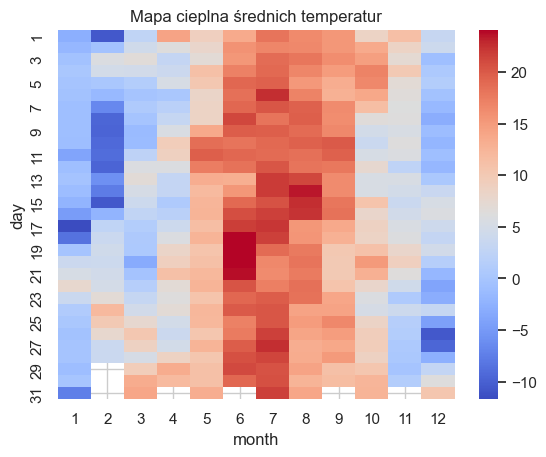

In [8]:
pivot = df.pivot_table(index='day', columns='month', values='Temperatura', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm', annot=False)
plt.title('Mapa cieplna średnich temperatur')
plt.show()


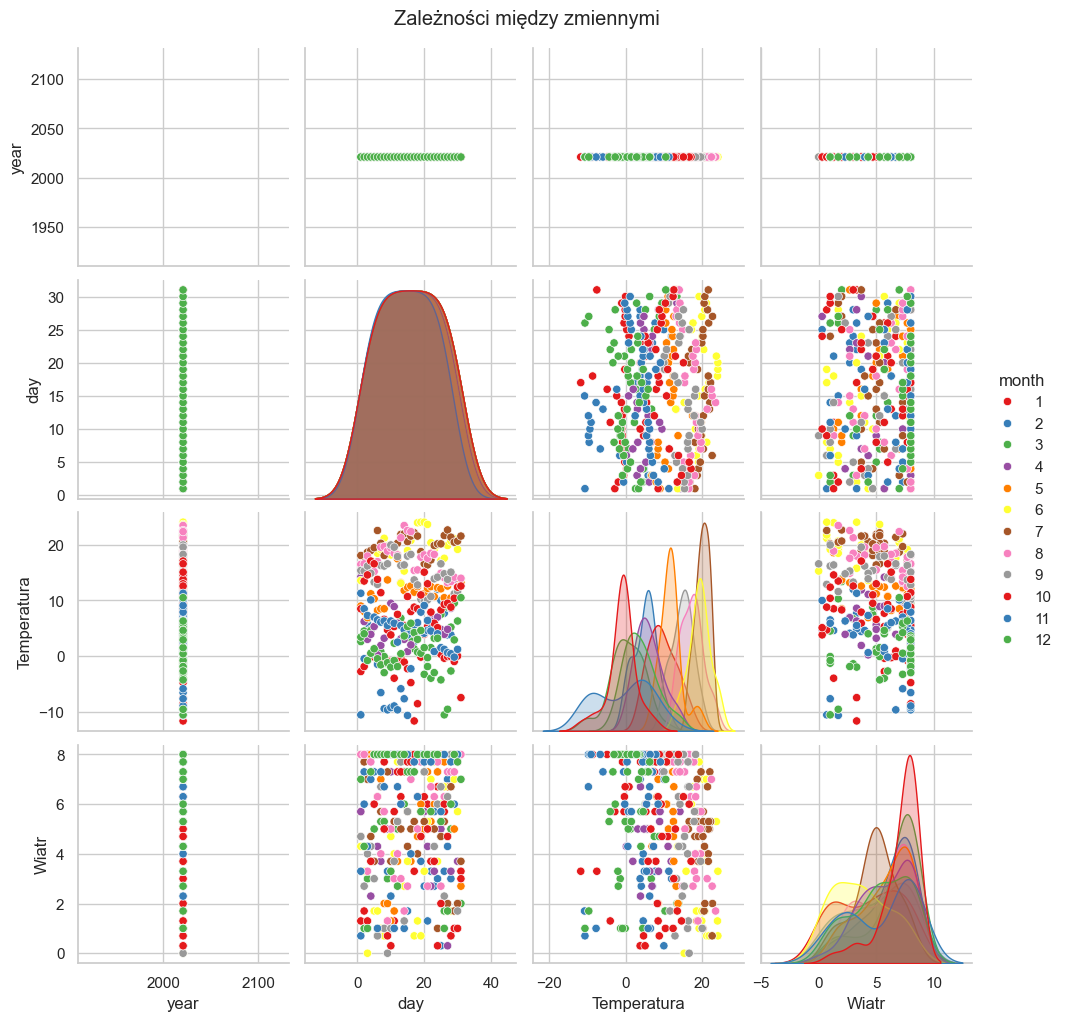

In [19]:
sns.pairplot(df, diag_kind='kde',hue='month', palette='Set1', markers='o', height=2.5)
plt.suptitle('Zależności między zmiennymi', y=1.02)
plt.show()
